# Análisis numérico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leer el conjunto de datos

In [2]:
data = pd.read_csv('Data/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Reconocimiento de tipo de datos

In [3]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')

El tipo de dato float64 tiene un total de 65 variables
El tipo de dato int64 tiene un total de 41 variables
El tipo de dato object tiene un total de 16 variables


In [5]:
# Crear un diccionario para almacenar las variables y su cantidad de valores únicos
leng_dict = {}

for var in data.columns:
    if len(data[var].unique()) < 15:
        leng_dict[var] = len(data[var].unique())

# Convertir el diccionario en un DataFrame
leng_df = pd.DataFrame(list(leng_dict.items()), columns=['Variable', 'Unique_Count'])

# Ordenar el DataFrame de manera descendente por 'Unique_Count'
leng_df_sorted = leng_df.sort_values(by='Unique_Count', ascending=False)

# Mostrar el DataFrame ordenado
leng_df_sorted.head(4)

,Variable,Unique_Count
54,AMT_REQ_CREDIT_BUREAU_QRT,12
29,DEF_30_CNT_SOCIAL_CIRCLE,11
53,AMT_REQ_CREDIT_BUREAU_WEEK,10
52,AMT_REQ_CREDIT_BUREAU_DAY,10


## Cambio de tipo de datos

Acá decidimos convertir el tipo de datos a `category` para las variables que eran `object` o directamente tenian menos de 12 valores únicos.

In [6]:
for var in data.columns:
    if len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    elif var in ["CNT_CHILDREN","CNT_FAM_MEMBERS"]:
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')


Agrupamos por las variables por tipo de dato para determinar cuántas variables numéricas y categóricas hay en el conjunto de datos.

In [7]:
# Convertir los tipos de datos a cadenas para evitar problemas de comparación
dtypes_grouped = data.columns.to_series().groupby(data.dtypes.apply(str)).apply(list)
group_keys = dtypes_grouped.keys()

# Imprimir la cantidad de columnas por tipo de dato
for key in group_keys:
    print(f'El tipo de dato {key} tiene un total de {len(dtypes_grouped[key])} variables')


El tipo de dato category tiene un total de 59 variables
El tipo de dato float64 tiene un total de 63 variables


## Análisis univariado

### Pruebas de normalidad

Realizamos la prueba de normalidad de Shapiro Wilk, para ello importamos la librería a utilizar.

In [8]:
from scipy.stats import shapiro

numeric_cols = dtypes_grouped[group_keys[1]]

Pese a que en la fase de visualización de las distribuciones de cada variable pudimos evidenciar la no-normalidad de las mismas, decidimos realizar la prueba de normalidad por protocolo. También reconocemos que la esta prueba de normalidad suele ser útil en conjunto de datos pequeños, y por lo cual podría no ser eficaz en este caso, decidimos implementarla más que todo por lo que ya sabiamos *(por las visualizaciones)* que no son normales.

In [9]:
# Crear una lista para almacenar los resultados
results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    # Realizar la prueba de normalidad Shapiro-Wilk
    _, p_value = shapiro(data[col])
    
    # Determinar si es normal o no
    normality = "Normal" if p_value >= 0.05 else "-"
    
    # Agregar el resultado a la lista
    results.append({'Variable': col, 'Normalidad': normality})

# Convertir la lista de resultados a un DataFrame
normality_results = pd.DataFrame(results)

normality_results.head(4)

/home/sebastian/miniconda3/envs/transmilenio/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307511.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,Normalidad
0,SK_ID_CURR,-
1,AMT_INCOME_TOTAL,-
2,AMT_CREDIT,-
3,AMT_ANNUITY,-


Cómo podemos ver ninguna variable es reconocida como normal, bajo la prueba de Skapiro Wilk, la celda de abajo muestra las variables que mediante el P-Valor de Shapiro Wilk, deberían ser normales.

In [10]:
normality_results[normality_results["Normalidad"] != '-']

,Variable,Normalidad


### Visualización

Ahora empezaremos a visualizar las distribuciones de las variables numéricas para poder realizar un análisis descriptivo sobre las mismas.

#### Sobre cliente

En primera instancia vamos a considerar la información que corresponde al cliente, decriptores como cuántos hijos tiene, cuánto gana, etc. Variables que describen al cliente.

* Con la información obtenida de `OWN_CAR_AGE` podemos evidenciar que el **75%** de los clientes cuentan con carro no mayor a **15 años** de antiguedad. Aunque se evidencia un grupo de clientes que posee un vehiculo mayor a 60 años de antiguedad, seguramente pertenecientes al grupo etario de los adultos mayores.

* Podemos evidenciar que la mayoría de los clientes tienen **2 hijos**

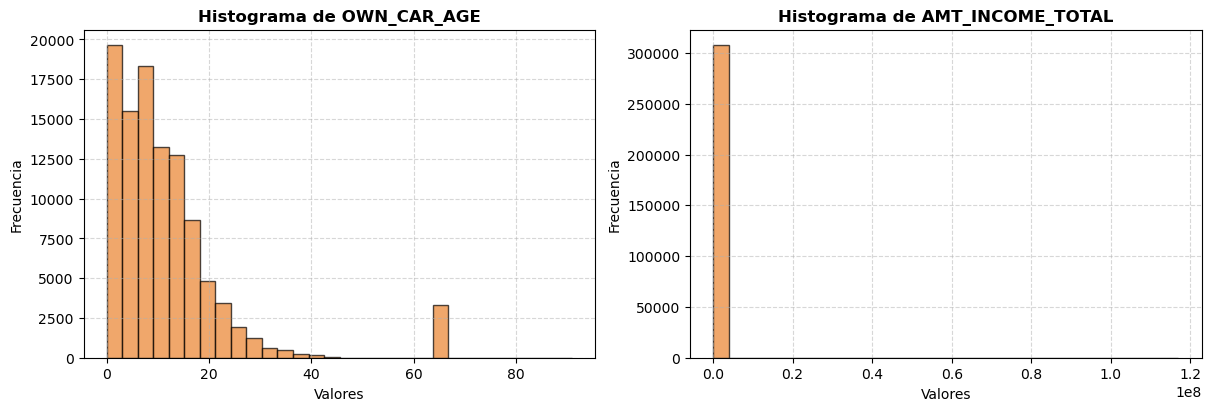

In [11]:
# Lista de variables a graficar
variables = [
    "OWN_CAR_AGE",  # Esta variable es numérica (histograma)
    "AMT_INCOME_TOTAL",  # Esta variable es numérica (histograma)
]

# Crear la figura y los ejes (2 filas, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    
    ax.hist(data[var], bins=30, color="#EA822D", alpha=0.7, edgecolor="black")
    ax.set_title(f"Histograma de {var}", fontsize=12, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=10)
    ax.set_ylabel("Frecuencia", fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Mostrar la figura
plt.show()

In [12]:
data[variables].describe()

,OWN_CAR_AGE,AMT_INCOME_TOTAL
count,104582.000000,3.075110e+05
mean,12.061091,1.687979e+05
std,11.944812,2.371231e+05
min,0.000000,2.565000e+04
25%,5.000000,1.125000e+05
50%,9.000000,1.471500e+05
75%,15.000000,2.025000e+05
max,91.000000,1.170000e+08


En el caso de la información del score *(asumimos que crediticio)* proveniente de tres (3) centrales de riesgo diferentes, podemos obsevar lo siguiente:

* El score de la primera central nos indica que el **50%** de los clientes cuenta con un score entre **33%** y **67%**, lo cual indica un comportamiento promedio en comparación con las demás centrales.

* La segunda y tercera central reporta una mayor concentración de clientes con un score entre el **50%** y **80%**, lo cual nos indica un mejor perfil crediticio del cliente.

**Nota:** Toca tener en cuenta que este score, según el diccionario de datos está normalizado, por lo cual la inferencia que se realizó sobre estas variables podría estar sujeta a sesgos.

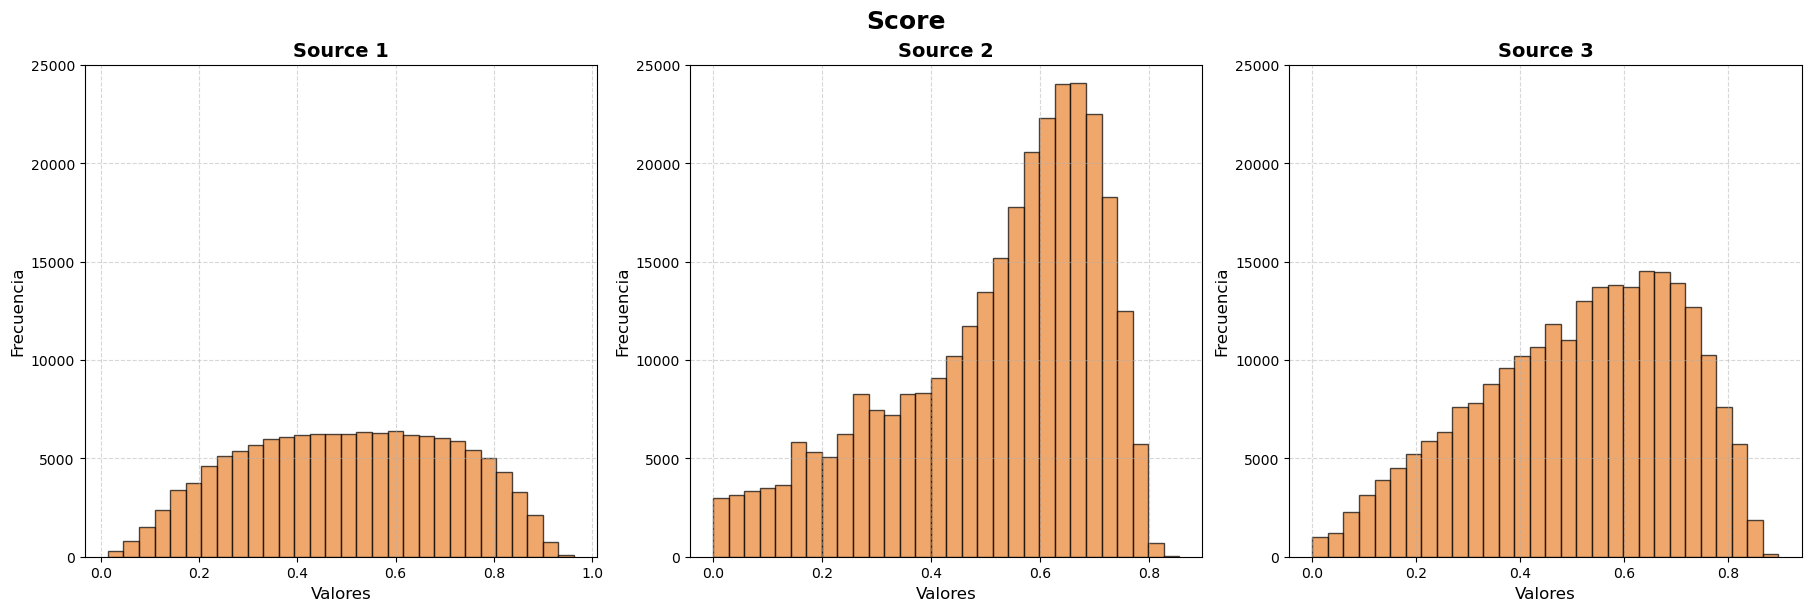

In [13]:
# Lista de variables a graficar
variables = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

# Crear figura y ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Score', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 4)):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Source {i}", fontsize=14, fontweight="bold")  # Título personalizado
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000)  # Establecer límites en el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [14]:
data[variables].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


* Considerando la información proporcionada por el diccionario de datos, es posible afirmar que el **50%** de los clientes habita en una región con indice de población.

* De igual forma se evidencia que la mitad de los clientes no cambian de celular por al menos **2 años** al momento de solicitar el préstamo a la entidad bancaria.

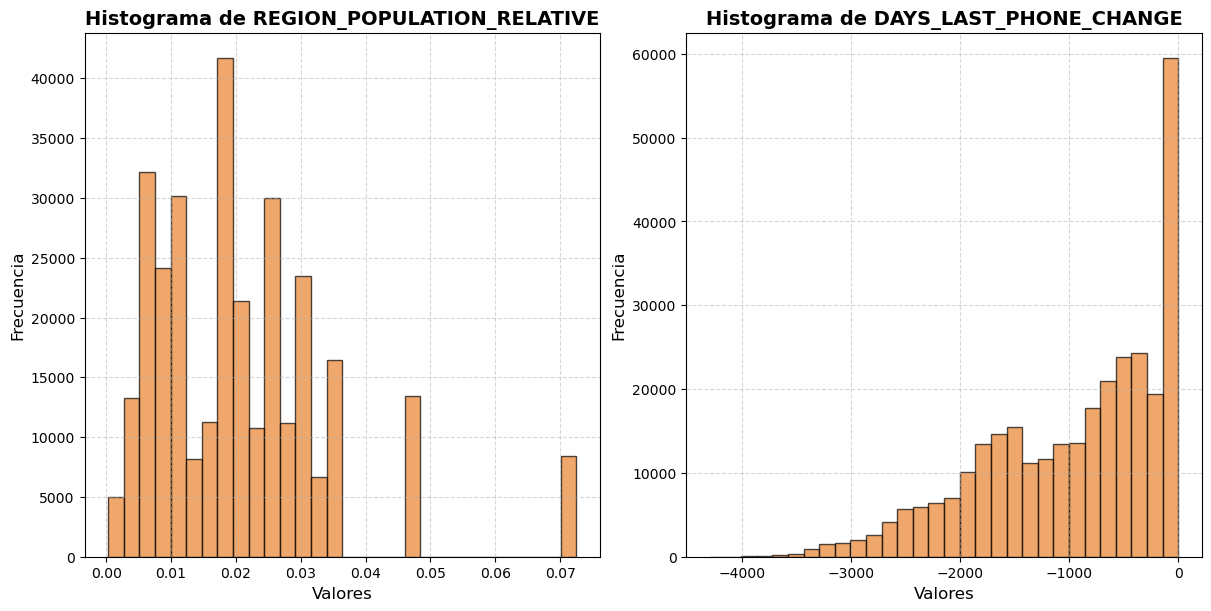

In [15]:
# Variables: REGION_POPULATION_RELATIVE y DAYS_LAST_PHONE_CHANGE
variables = ["REGION_POPULATION_RELATIVE", "DAYS_LAST_PHONE_CHANGE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [16]:
data[variables].describe()

,REGION_POPULATION_RELATIVE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307510.000000
mean,0.020868,-962.858788
std,0.013831,826.808487
min,0.000290,-4292.000000
25%,0.010006,-1570.000000
50%,0.018850,-757.000000
75%,0.028663,-274.000000
max,0.072508,0.000000


#### Información de donde vive el cliente

En esta sección se consideran descriptores de la vivienda del cliente, tales como antiguedad de la construcción, número de pisos, etc. Adicionalmente se cuenta con tres categorías posiblas para cada descriptor *(_AVG, _MODE, _MEDI)*, por lo cual se realiza el análisis de las tres categorías para cada descriptor.

Para el grupo relacionado con `APARTMENTS`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

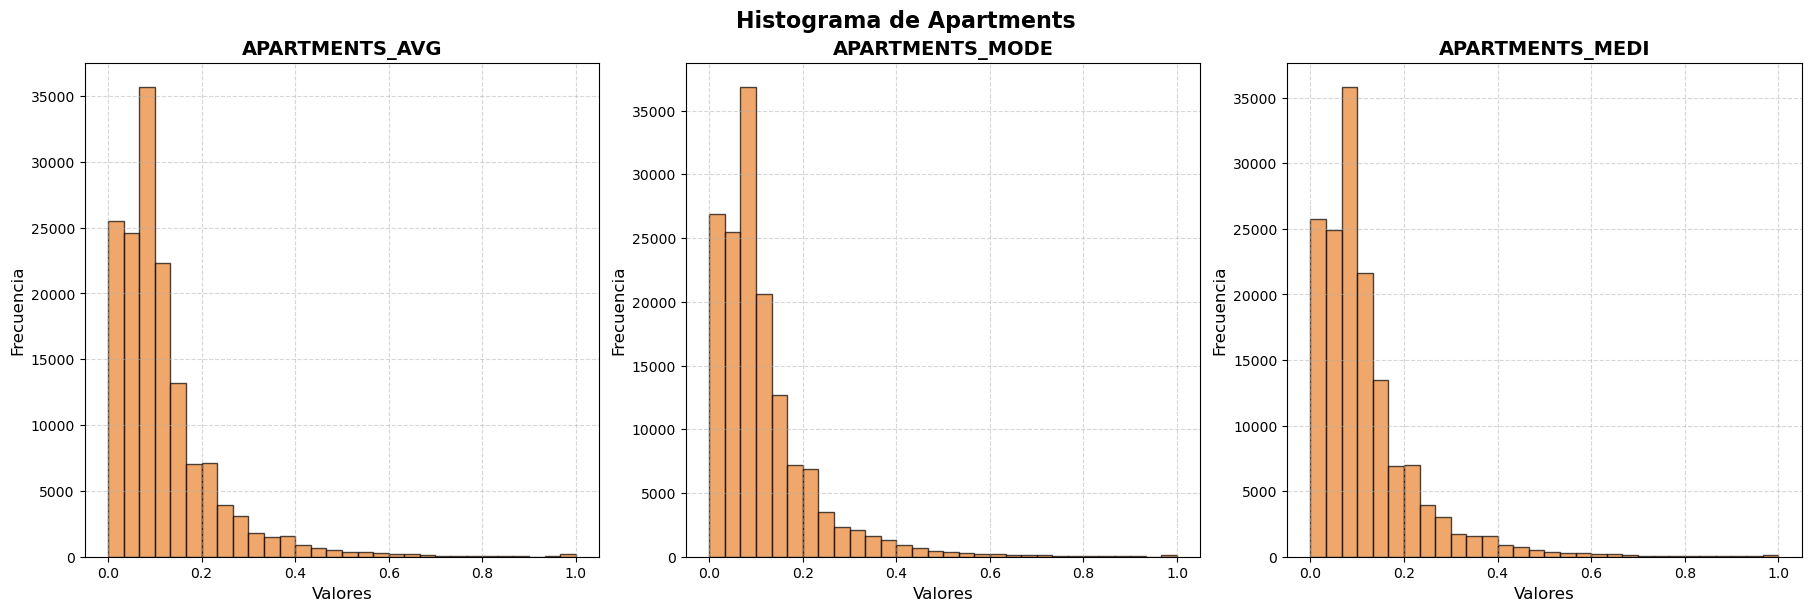

In [17]:
# 1. Grupo: "APARTMENTS"
apartment_variables = [
    "APARTMENTS_AVG", "APARTMENTS_MODE", "APARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "APARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, apartment_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Apartments", fontsize=16, fontweight="bold")
plt.show()

In [18]:
data[apartment_variables].describe()

,APARTMENTS_AVG,APARTMENTS_MODE,APARTMENTS_MEDI
count,151450.00000,151450.000000,151450.000000
mean,0.11744,0.114231,0.117850
std,0.10824,0.107936,0.109076
min,0.00000,0.000000,0.000000
25%,0.05770,0.052500,0.058300
50%,0.08760,0.084000,0.086400
75%,0.14850,0.143900,0.148900
max,1.00000,1.000000,1.000000


Para el grupo relacionado con `BASEMENTAREA`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

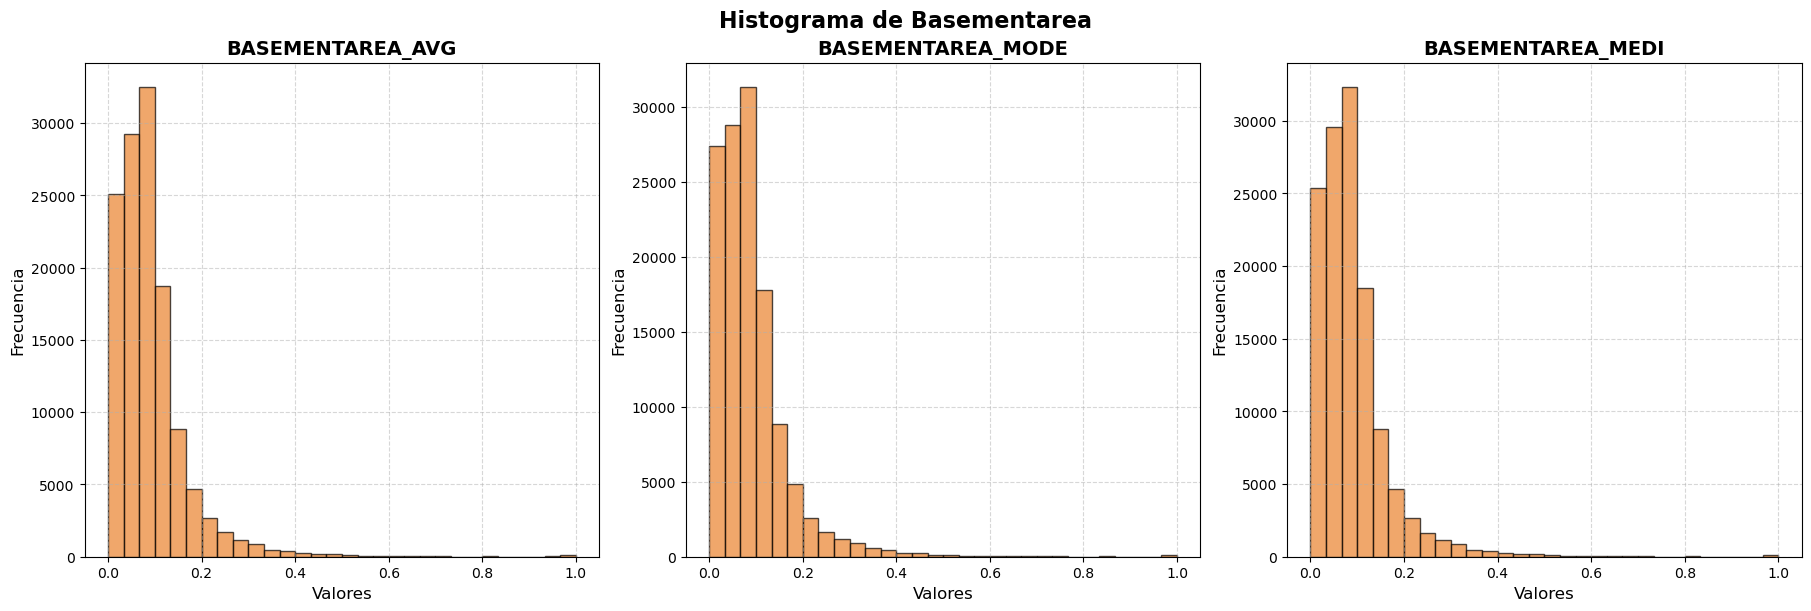

In [19]:
# 2. Grupo: "BASEMENTAREA"
basementarea_variables = [
    "BASEMENTAREA_AVG", "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI"
]

# Crear el gráfico para el grupo "BASEMENTAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, basementarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Basementarea", fontsize=16, fontweight="bold")
plt.show()

In [20]:
data[basementarea_variables].describe()

,BASEMENTAREA_AVG,BASEMENTAREA_MODE,BASEMENTAREA_MEDI
count,127568.000000,127568.000000,127568.000000
mean,0.088442,0.087543,0.087955
std,0.082438,0.084307,0.082179
min,0.000000,0.000000,0.000000
25%,0.044200,0.040700,0.043700
50%,0.076300,0.074600,0.075800
75%,0.112200,0.112400,0.111600
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `YEARS_BEGINEXPLUATATION`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

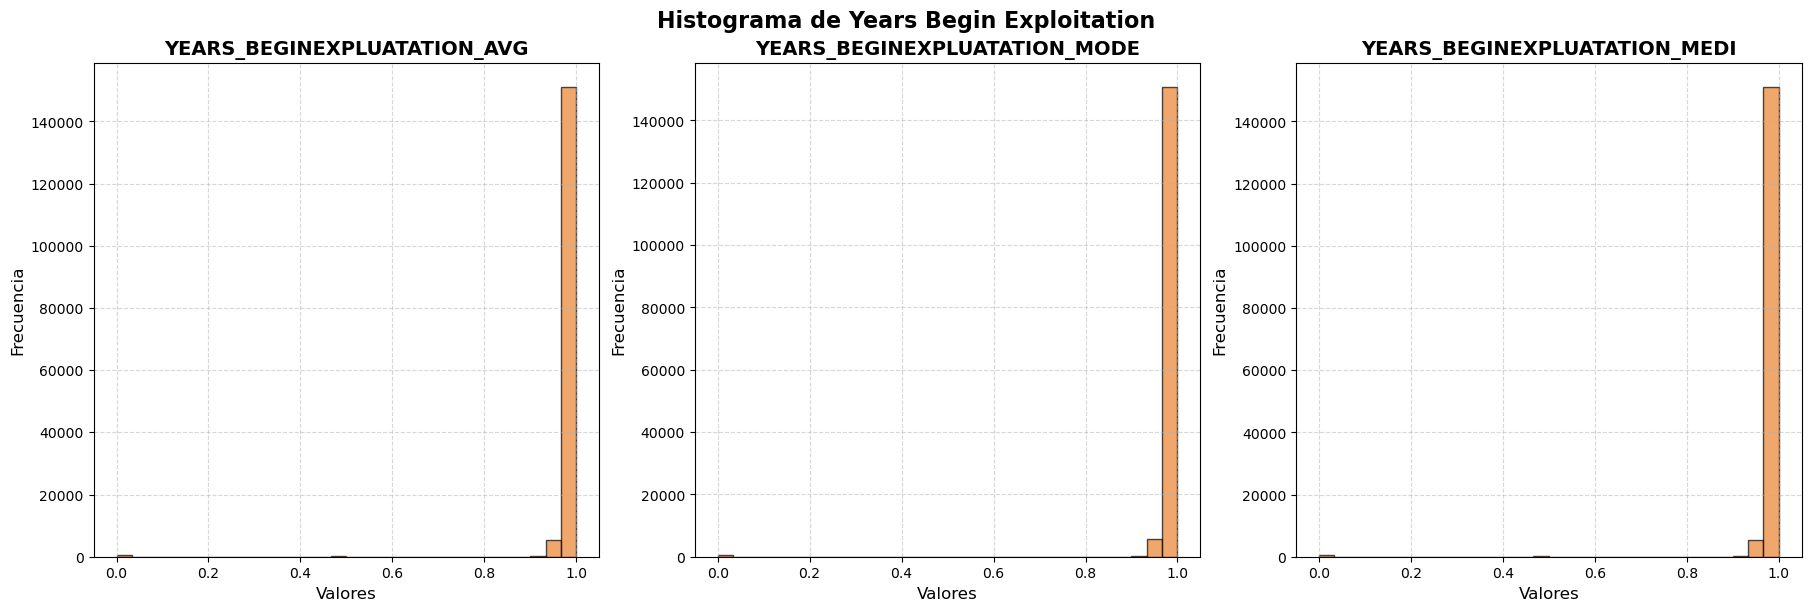

In [21]:
# 3. Grupo: "YEARS_BEGINEXPLUATATION"
years_beginexploitation_variables = [
    "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI"
]

# Crear el gráfico para el grupo "YEARS_BEGINEXPLUATATION"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, years_beginexploitation_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Years Begin Exploitation", fontsize=16, fontweight="bold")
plt.show()

In [22]:
data[years_beginexploitation_variables].describe()

,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI
count,157504.000000,157504.000000,157504.000000
mean,0.977735,0.977065,0.977752
std,0.059223,0.064575,0.059897
min,0.000000,0.000000,0.000000
25%,0.976700,0.976700,0.976700
50%,0.981600,0.981600,0.981600
75%,0.986600,0.986600,0.986600
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `YEARS_BUILD`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

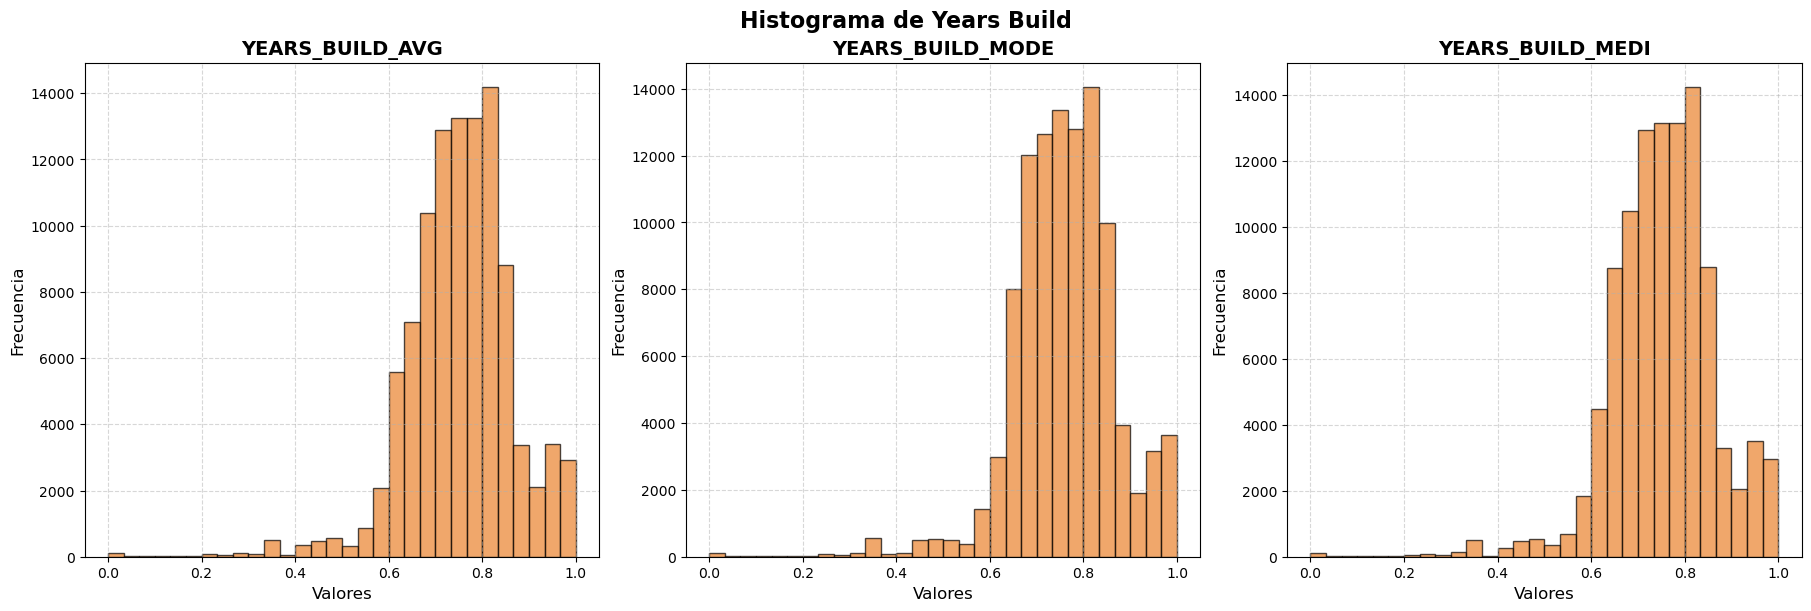

In [23]:
# 4. Grupo: "YEARS_BUILD"
years_build_variables = [
    "YEARS_BUILD_AVG", "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI"
]

# Crear el gráfico para el grupo "YEARS_BUILD"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, years_build_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Years Build", fontsize=16, fontweight="bold")
plt.show()

In [24]:
data[years_build_variables].describe()

,YEARS_BUILD_AVG,YEARS_BUILD_MODE,YEARS_BUILD_MEDI
count,103023.000000,103023.000000,103023.000000
mean,0.752471,0.759637,0.755746
std,0.113280,0.110111,0.112066
min,0.000000,0.000000,0.000000
25%,0.687200,0.699400,0.691400
50%,0.755200,0.764800,0.758500
75%,0.823200,0.823600,0.825600
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `COMMONAREA`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

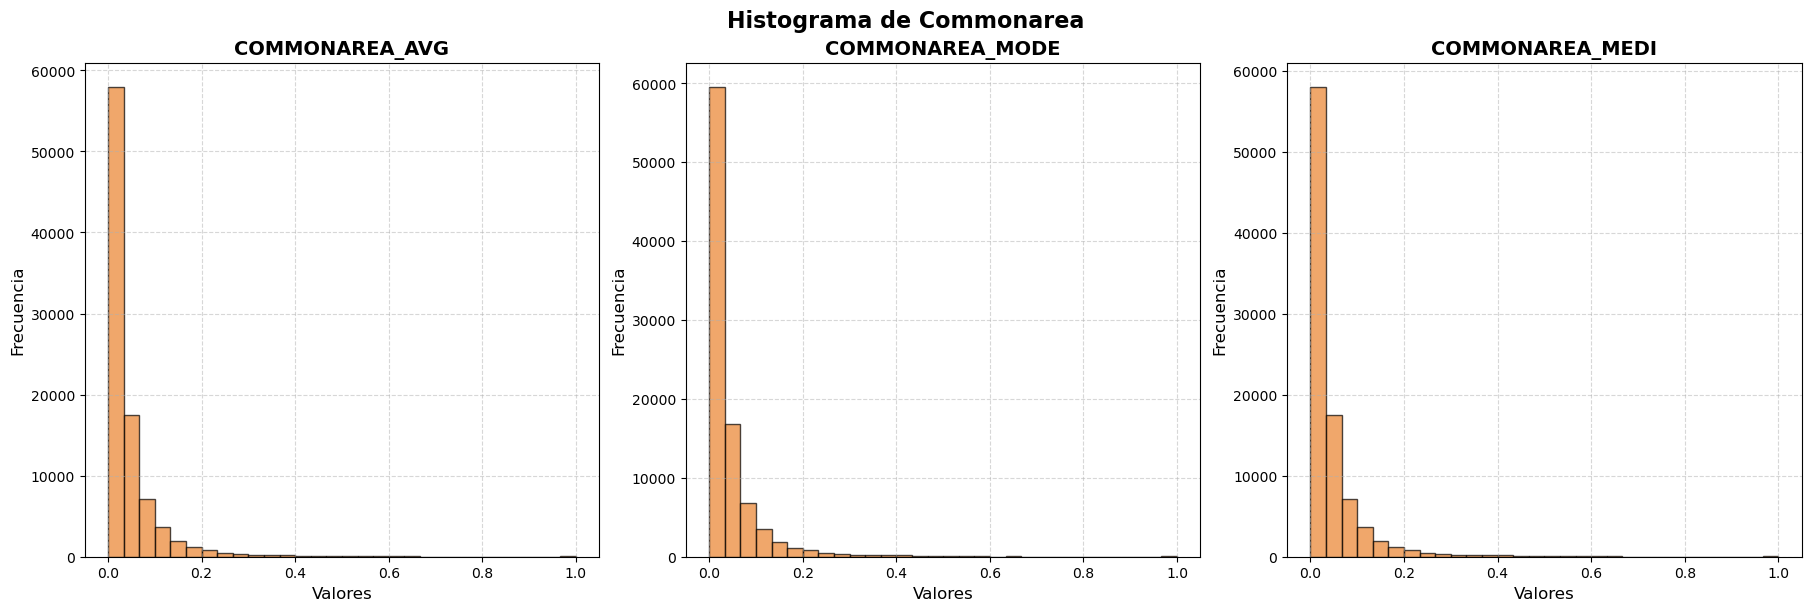

In [25]:
# 5. Grupo: "COMMONAREA"
commonarea_variables = [
    "COMMONAREA_AVG", "COMMONAREA_MODE", "COMMONAREA_MEDI"
]

# Crear el gráfico para el grupo "COMMONAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, commonarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Commonarea", fontsize=16, fontweight="bold")
plt.show()

In [26]:
data[commonarea_variables].describe()

,COMMONAREA_AVG,COMMONAREA_MODE,COMMONAREA_MEDI
count,92646.000000,92646.000000,92646.000000
mean,0.044621,0.042553,0.044595
std,0.076036,0.074445,0.076144
min,0.000000,0.000000,0.000000
25%,0.007800,0.007200,0.007900
50%,0.021100,0.019000,0.020800
75%,0.051500,0.049000,0.051300
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `ELEVATORS`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

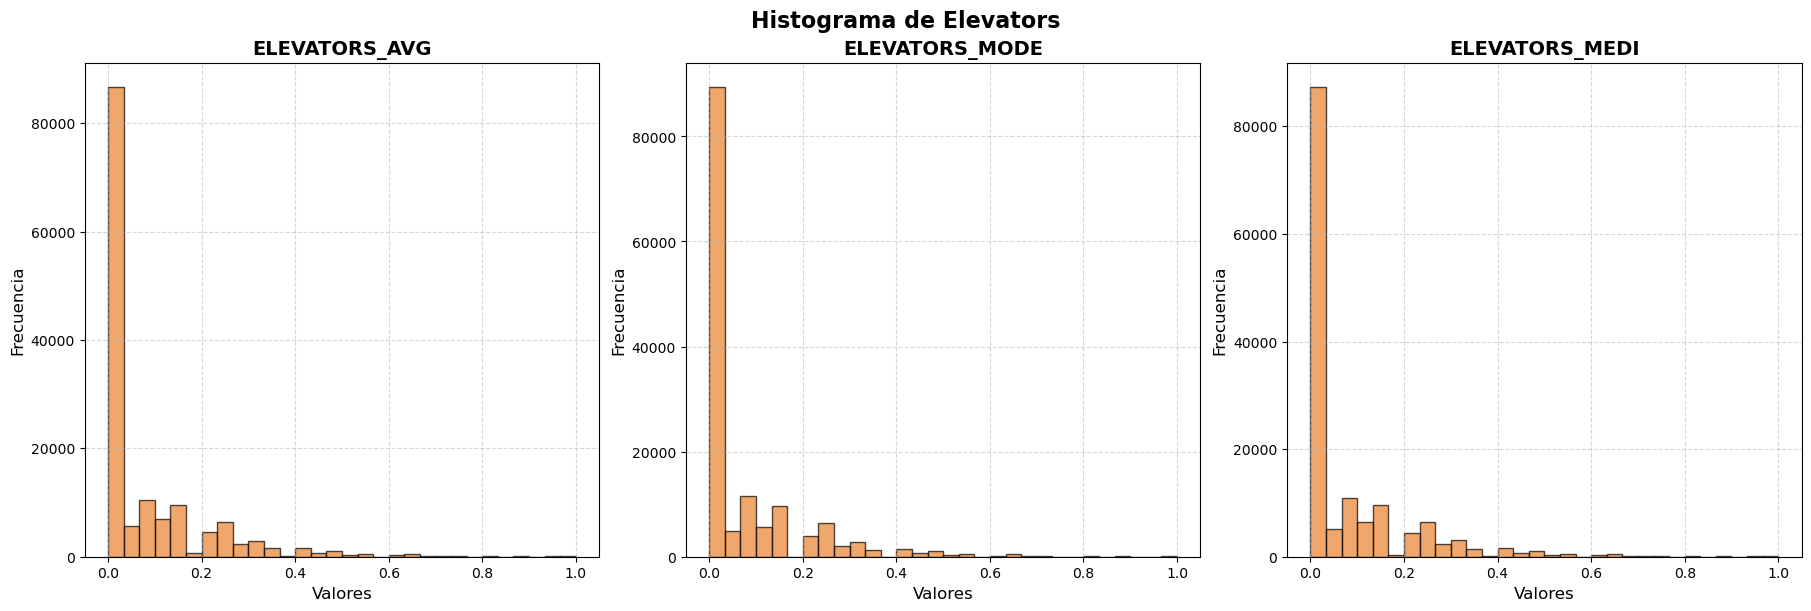

In [27]:
# 6. Grupo: "ELEVATORS"
elevators_variables = [
    "ELEVATORS_AVG", "ELEVATORS_MODE", "ELEVATORS_MEDI"
]

# Crear el gráfico para el grupo "ELEVATORS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, elevators_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Elevators", fontsize=16, fontweight="bold")
plt.show()

In [28]:
data[elevators_variables].describe()

,ELEVATORS_AVG,ELEVATORS_MODE,ELEVATORS_MEDI
count,143620.000000,143620.000000,143620.000000
mean,0.078942,0.074490,0.078078
std,0.134576,0.132256,0.134467
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.120000,0.120800,0.120000
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `ENTRANCES`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

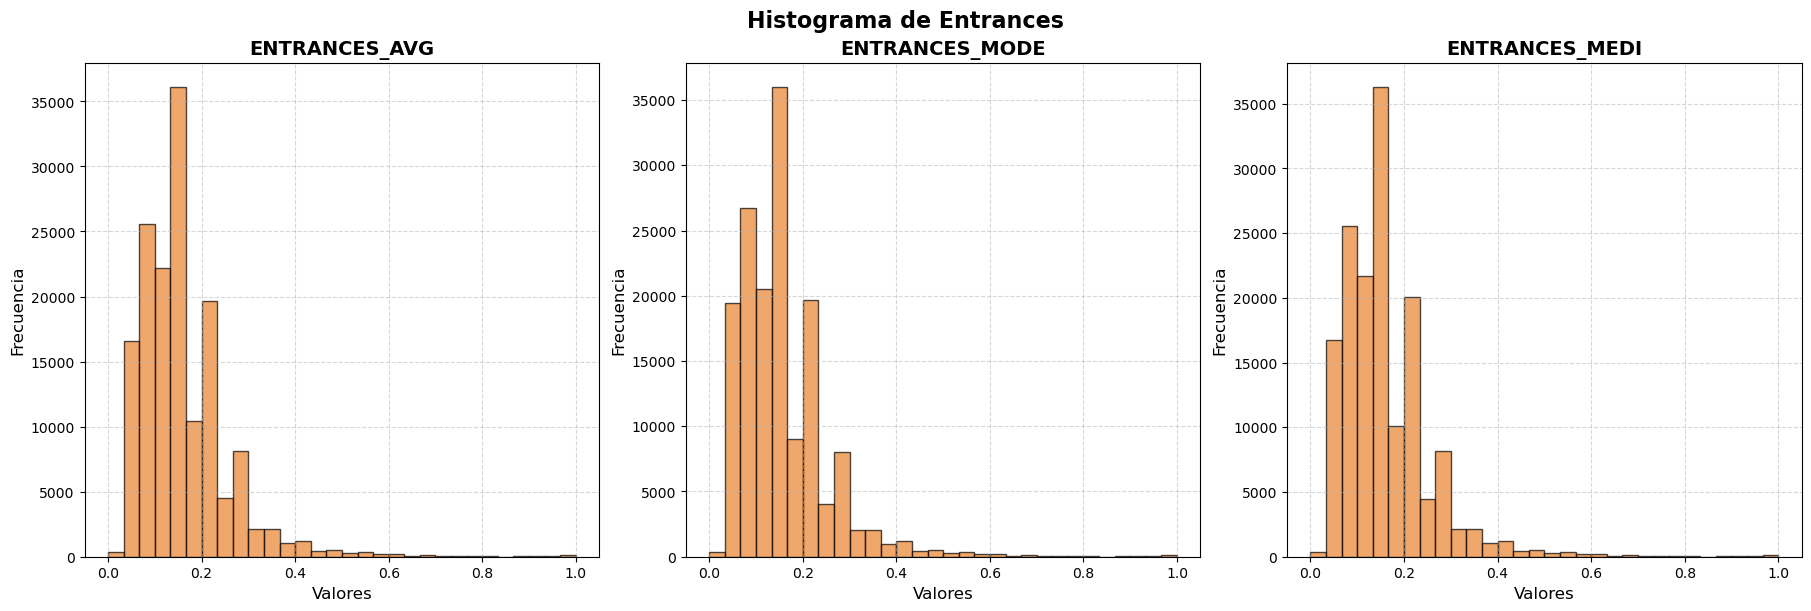

In [29]:
# 7. Grupo: "ENTRANCES"
entrances_variables = [
    "ENTRANCES_AVG", "ENTRANCES_MODE", "ENTRANCES_MEDI"
]

# Crear el gráfico para el grupo "ENTRANCES"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, entrances_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Entrances", fontsize=16, fontweight="bold")
plt.show()

In [30]:
data[entrances_variables].describe()

,ENTRANCES_AVG,ENTRANCES_MODE,ENTRANCES_MEDI
count,152683.000000,152683.000000,152683.000000
mean,0.149725,0.145193,0.149213
std,0.100049,0.100977,0.100368
min,0.000000,0.000000,0.000000
25%,0.069000,0.069000,0.069000
50%,0.137900,0.137900,0.137900
75%,0.206900,0.206900,0.206900
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `FLOORSMAX`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

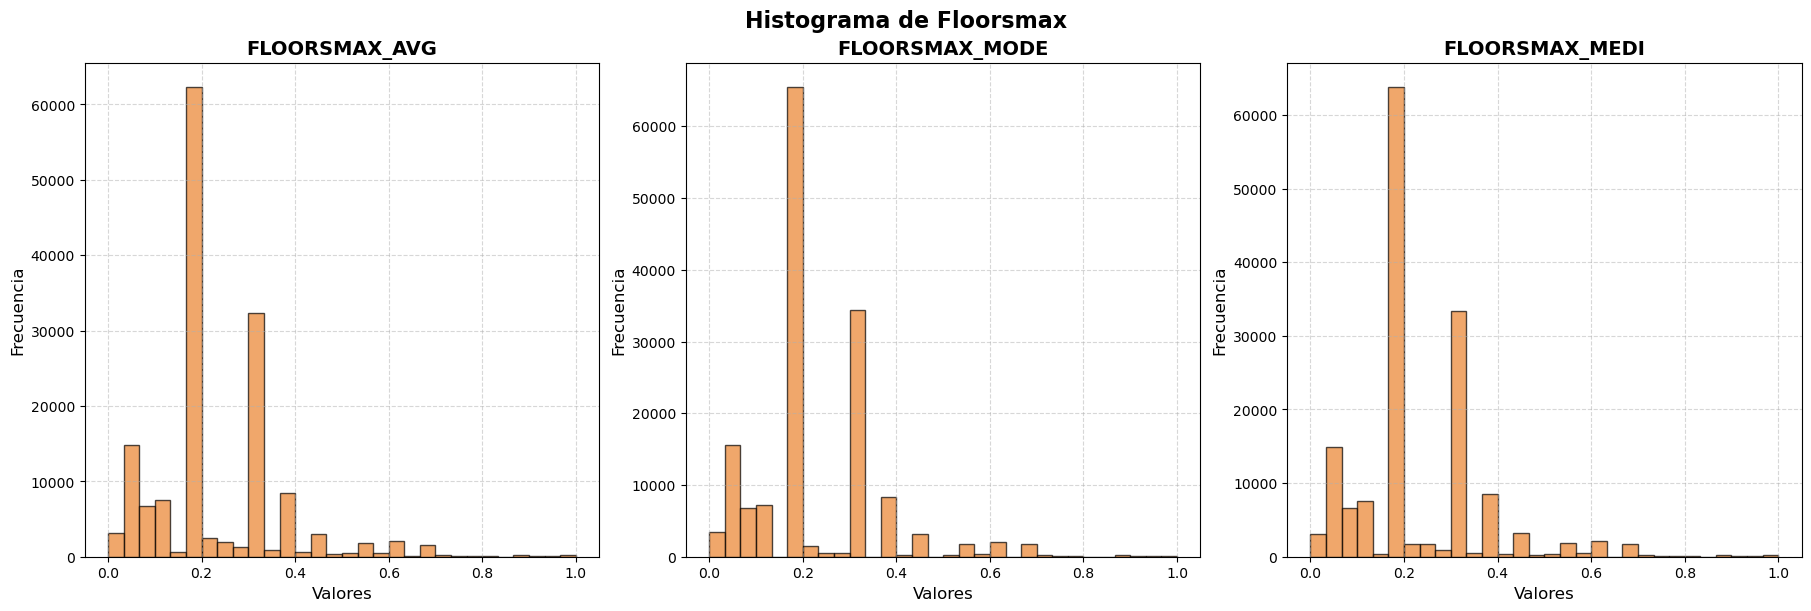

In [31]:
# 8. Grupo: "FLOORSMAX"
floorsmax_variables = [
    "FLOORSMAX_AVG", "FLOORSMAX_MODE", "FLOORSMAX_MEDI"
]

# Crear el gráfico para el grupo "FLOORSMAX"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, floorsmax_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Floorsmax", fontsize=16, fontweight="bold")
plt.show()

In [32]:
data[floorsmax_variables].describe()

,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI
count,154491.000000,154491.000000,154491.000000
mean,0.226282,0.222315,0.225897
std,0.144641,0.143709,0.145067
min,0.000000,0.000000,0.000000
25%,0.166700,0.166700,0.166700
50%,0.166700,0.166700,0.166700
75%,0.333300,0.333300,0.333300
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `FLOORSMIN`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

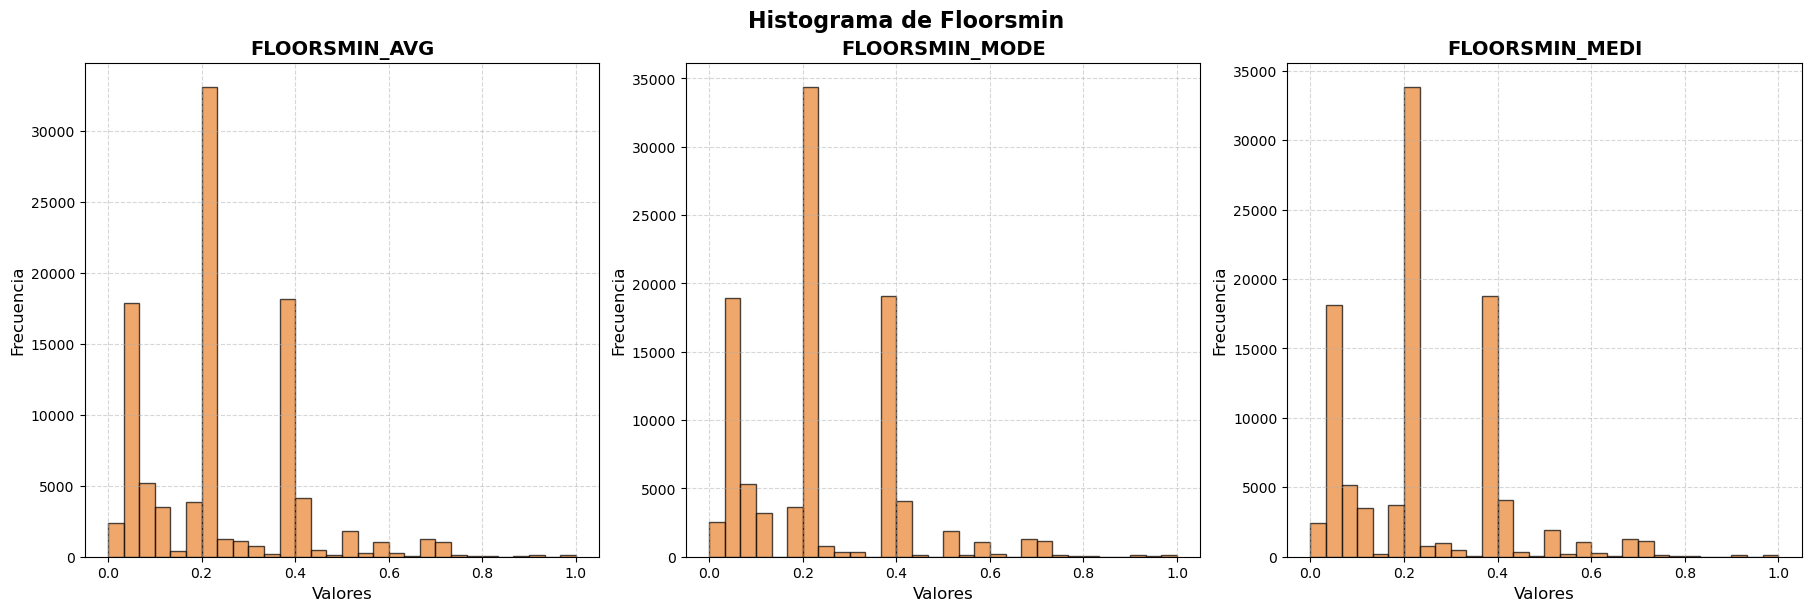

In [33]:
# 9. Grupo: "FLOORSMIN"
floorsmin_variables = [
    "FLOORSMIN_AVG", "FLOORSMIN_MODE", "FLOORSMIN_MEDI"
]

# Crear el gráfico para el grupo "FLOORSMIN"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, floorsmin_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Floorsmin", fontsize=16, fontweight="bold")
plt.show()


In [34]:
data[floorsmin_variables].describe()

,FLOORSMIN_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI
count,98869.000000,98869.000000,98869.000000
mean,0.231894,0.228058,0.231625
std,0.161380,0.161160,0.161934
min,0.000000,0.000000,0.000000
25%,0.083300,0.083300,0.083300
50%,0.208300,0.208300,0.208300
75%,0.375000,0.375000,0.375000
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `LIVINGAPARTMENTS`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

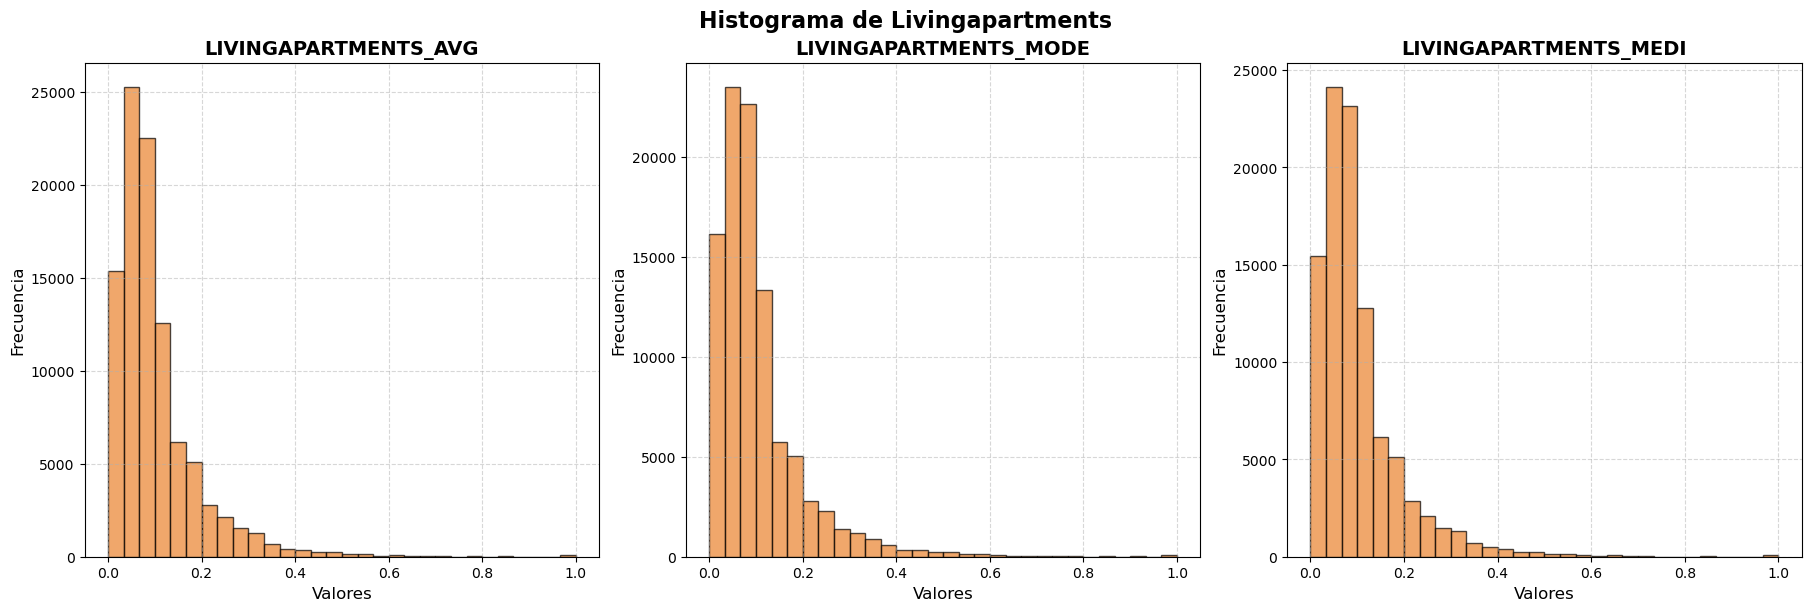

In [35]:
# 10. Grupo: "LIVINGAPARTMENTS"
livingapartments_variables = [
    "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "LIVINGAPARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, livingapartments_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Livingapartments", fontsize=16, fontweight="bold")
plt.show()

In [36]:
data[livingapartments_variables].describe()

,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI
count,97312.000000,97312.000000,97312.000000
mean,0.100775,0.105645,0.101954
std,0.092576,0.097880,0.093642
min,0.000000,0.000000,0.000000
25%,0.050400,0.054200,0.051300
50%,0.075600,0.077100,0.076100
75%,0.121000,0.131300,0.123100
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `LIVINGAREA`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

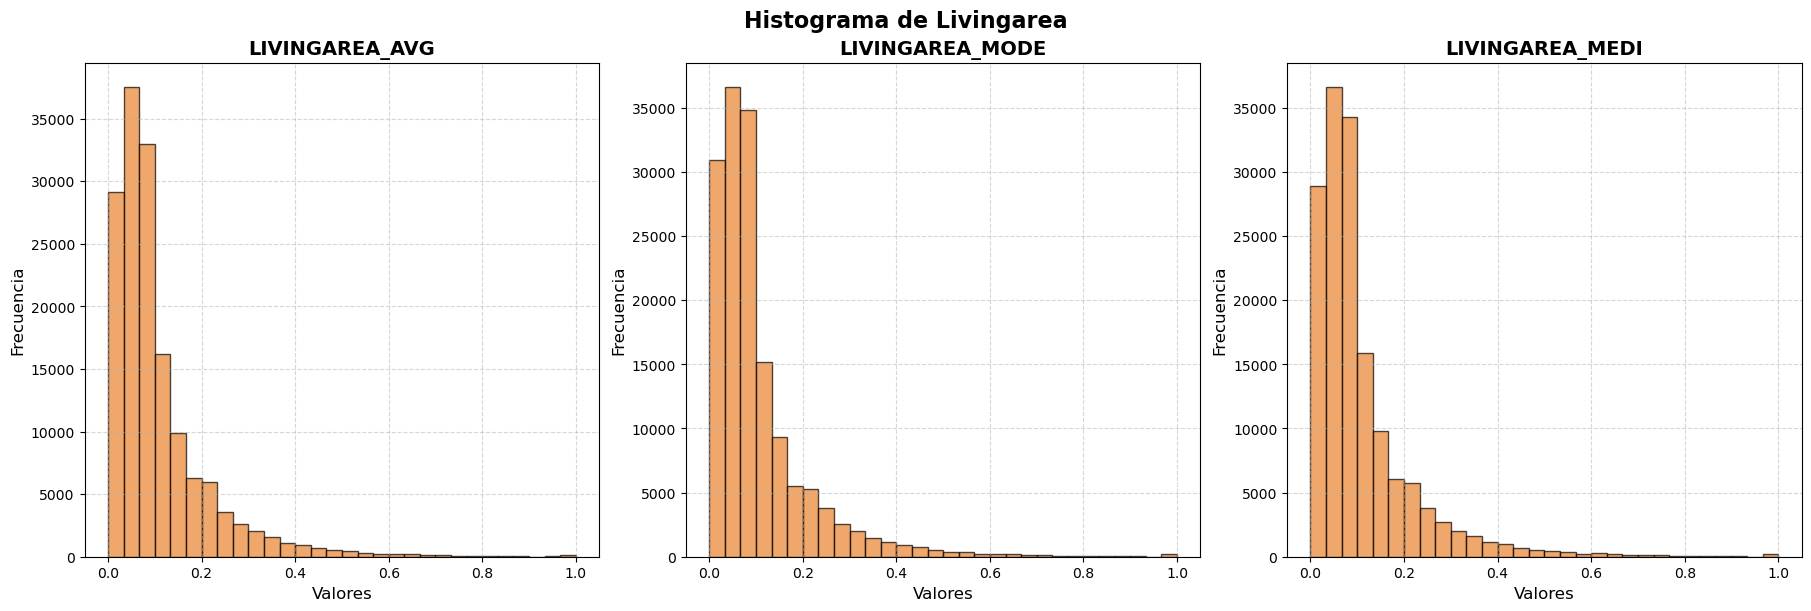

In [37]:
# 11. Grupo: "LIVINGAREA"
livingarea_variables = [
    "LIVINGAREA_AVG", "LIVINGAREA_MODE", "LIVINGAREA_MEDI"
]

# Crear el gráfico para el grupo "LIVINGAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, livingarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Livingarea", fontsize=16, fontweight="bold")
plt.show()

In [38]:
data[livingarea_variables].describe()

,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI
count,153161.000000,153161.000000,153161.000000
mean,0.107399,0.105975,0.108607
std,0.110565,0.111845,0.112260
min,0.000000,0.000000,0.000000
25%,0.045300,0.042700,0.045700
50%,0.074500,0.073100,0.074900
75%,0.129900,0.125200,0.130300
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `NONLIVINGAPARTMENTS`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

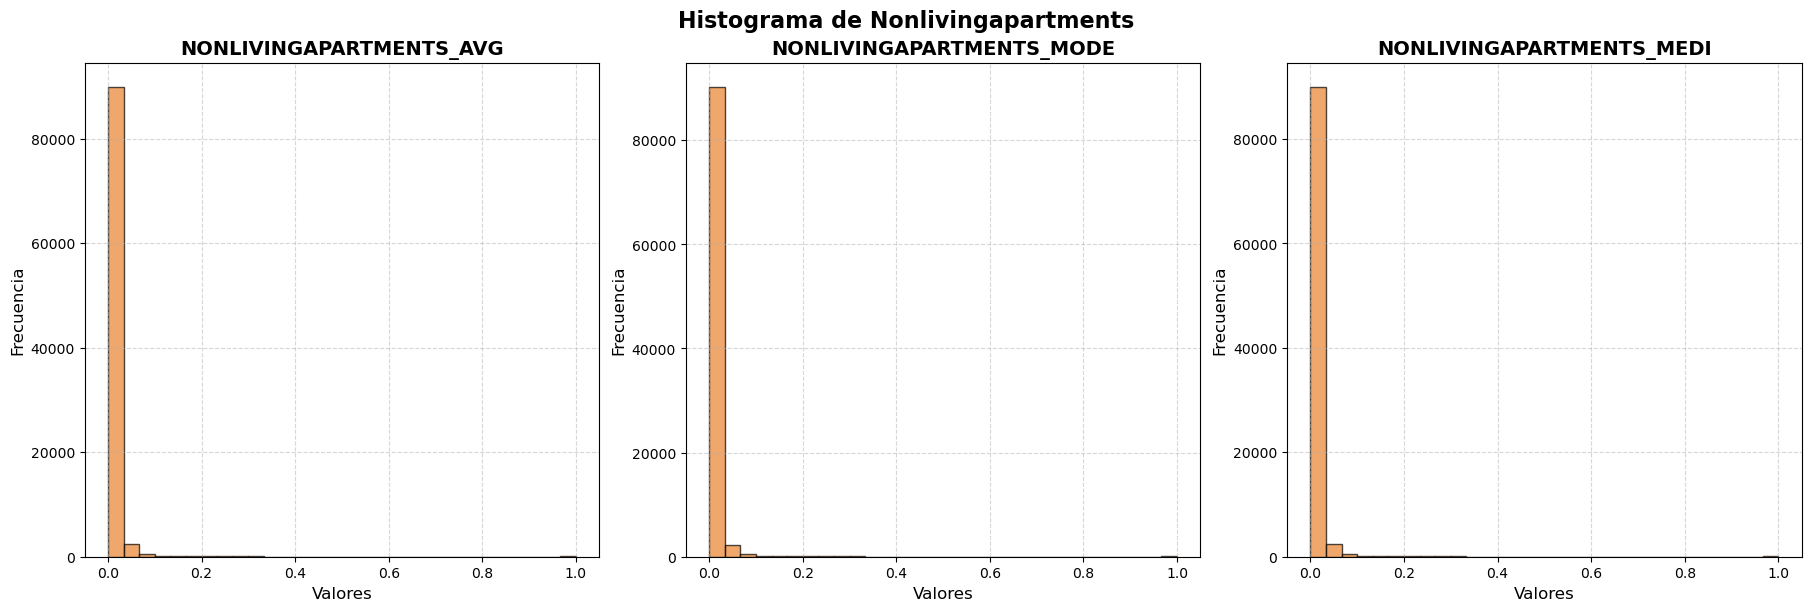

In [39]:
# 12. Grupo: "NONLIVINGAPARTMENTS"
nonlivingapartments_variables = [
    "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI"
]

# Crear el gráfico para el grupo "NONLIVINGAPARTMENTS"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, nonlivingapartments_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Nonlivingapartments", fontsize=16, fontweight="bold")
plt.show()

In [40]:
data[nonlivingapartments_variables].describe()

,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI
count,93997.000000,93997.000000,93997.000000
mean,0.008809,0.008076,0.008651
std,0.047732,0.046276,0.047415
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.003900,0.003900,0.003900
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `NONLIVINGAREA`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos.

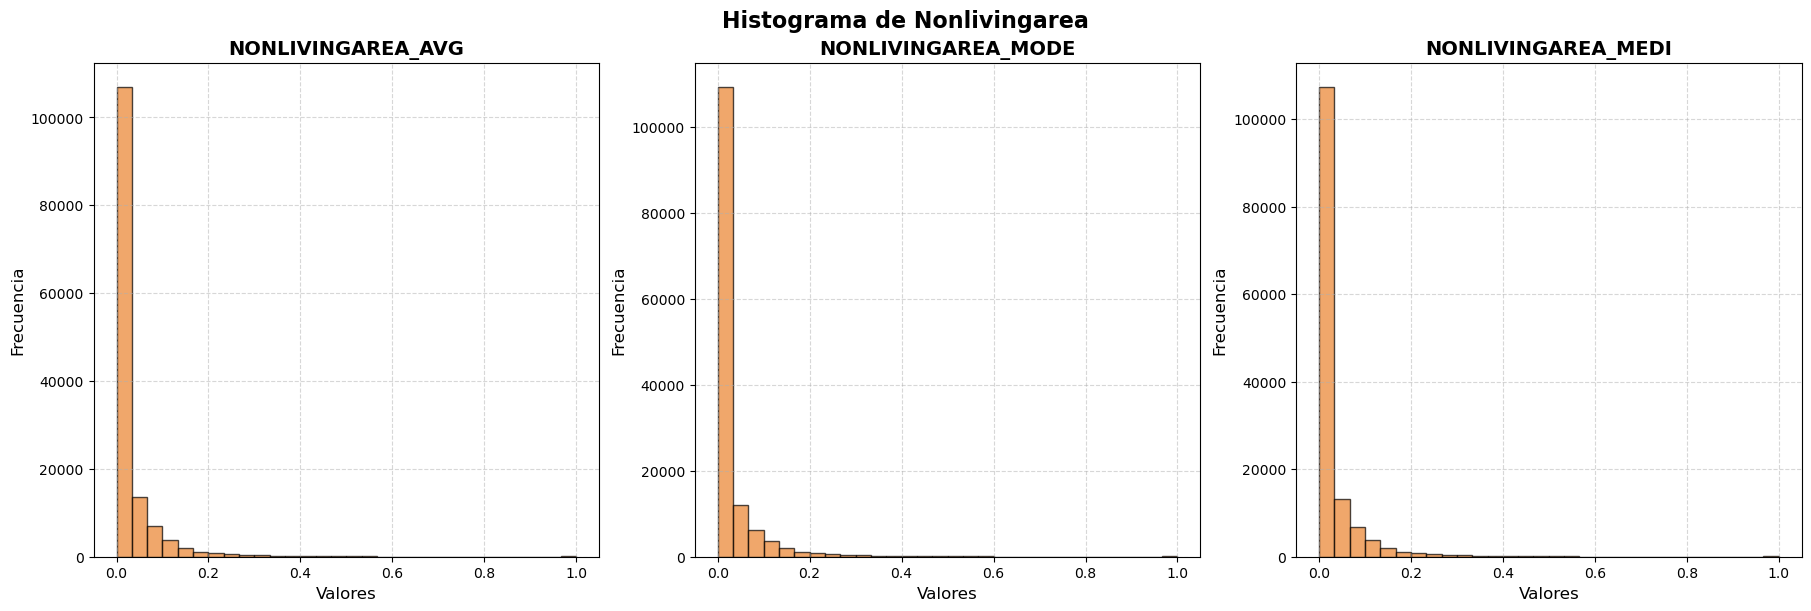

In [41]:
# 13. Grupo: "NONLIVINGAREA"
nonlivingarea_variables = [
    "NONLIVINGAREA_AVG", "NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI"
]

# Crear el gráfico para el grupo "NONLIVINGAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, nonlivingarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Nonlivingarea", fontsize=16, fontweight="bold")
plt.show()

In [42]:
data[nonlivingarea_variables].describe()

,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,NONLIVINGAREA_MEDI
count,137829.000000,137829.000000,137829.000000
mean,0.028358,0.027022,0.028236
std,0.069523,0.070254,0.070166
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.003600,0.001100,0.003100
75%,0.027700,0.023100,0.026600
max,1.000000,1.000000,1.000000


Para el grupo relacionado con `LANDAREA`, no se evidencia diferencia significativa mediante la comparación de distribuciones y estadísticos descriptivos en las categorías `AVG` y `MEDI`, sin embargo, la categoría `MODE` si presenta una ligera diferencia con respecto a las otras dos categorías.

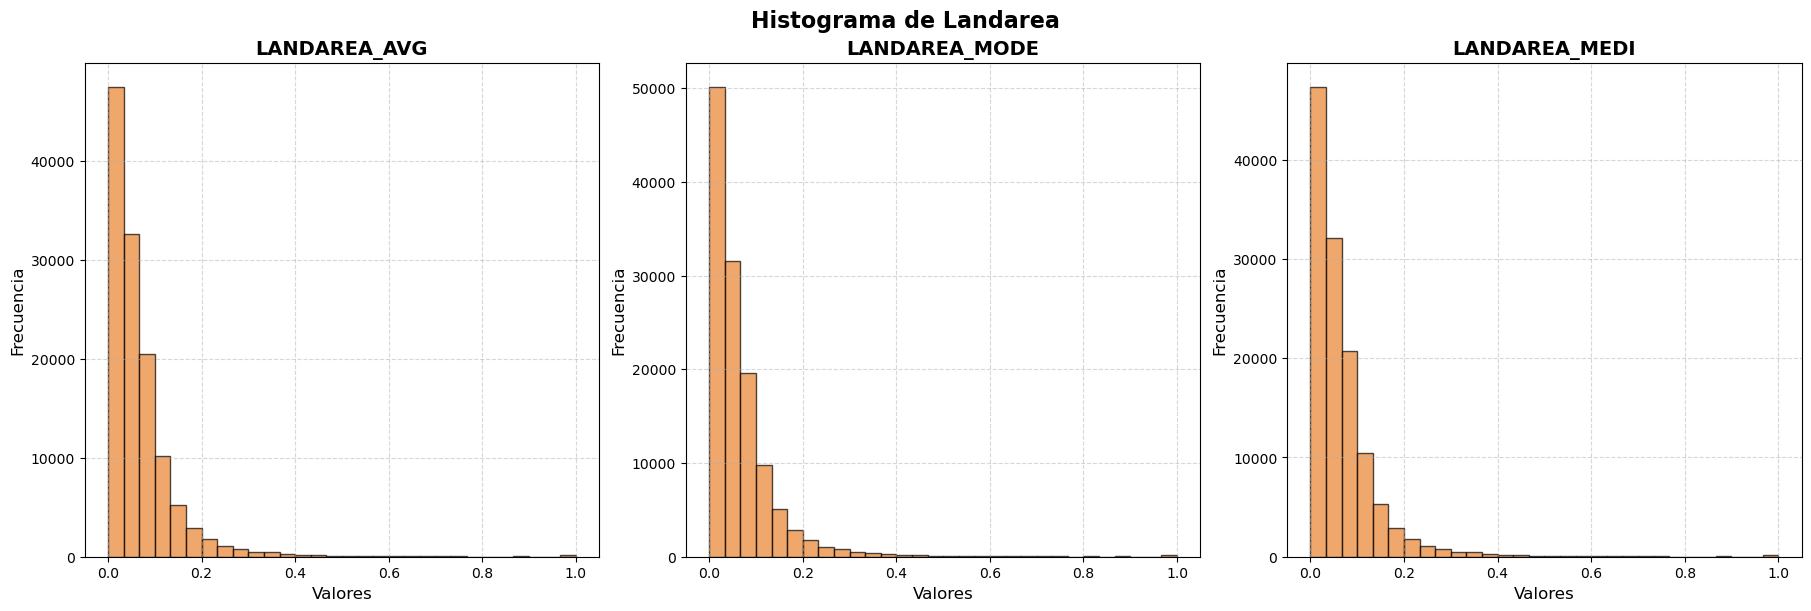

In [43]:
# 14. Grupo: "LANDAREA"
landarea_variables = [
    "LANDAREA_AVG", "LANDAREA_MODE", "LANDAREA_MEDI"
]

# Crear el gráfico para el grupo "LANDAREA"
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
for ax, var in zip(axes, landarea_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Landarea", fontsize=16, fontweight="bold")
plt.show()

In [44]:
data[landarea_variables].describe()

,LANDAREA_AVG,LANDAREA_MODE,LANDAREA_MEDI
count,124921.000000,124921.000000,124921.000000
mean,0.066333,0.064958,0.067169
std,0.081184,0.081750,0.082167
min,0.000000,0.000000,0.000000
25%,0.018700,0.016600,0.018700
50%,0.048100,0.045800,0.048700
75%,0.085600,0.084100,0.086800
max,1.000000,1.000000,1.000000


Finalmente, para `TOTALAREA_MODE` se evidencia que la mayoría de clientes habitan una vivienda con menor área construida, así mismo no se evidencia concentración de clientes que habiten viviendas con áreas mayores a **0.06**.

**Nota:** Las medidas de las variables presentes en esta sección estan normalizadas, por tal motivo no asumimos la escala de medición para esta variable.

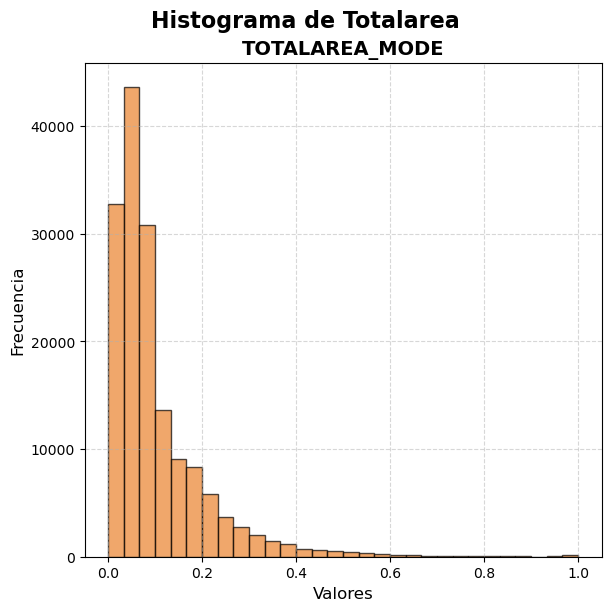

In [45]:
# 15. Grupo: "TOTALAREA"
totalarea_variables = [
    "TOTALAREA_MODE"
]

# Crear el gráfico para el grupo "TOTALAREA"
fig, axes = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
axes.hist(data[totalarea_variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
axes.set_title(f"{totalarea_variables[0]}", fontsize=14, fontweight="bold")
axes.set_xlabel("Valores", fontsize=12)
axes.set_ylabel("Frecuencia", fontsize=12)
axes.grid(True, linestyle="--", alpha=0.5)
fig.suptitle("Histograma de Totalarea", fontsize=16, fontweight="bold")
plt.show()


In [46]:
data["TOTALAREA_MODE"].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

#### Sobre la aplicación al préstamo

Estas variables almacenan información que mantiene mayor relación con el cliente al momento de solicitar un préstamo.

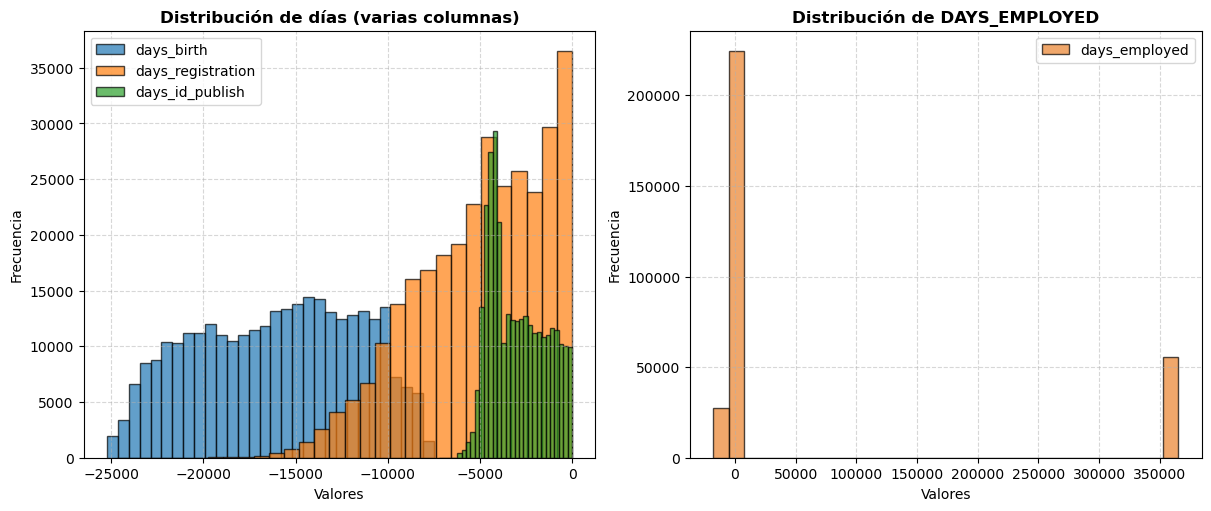

In [47]:
# Crear figura y dos axes en una fila, dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico de la izquierda: Múltiples variables
days_var = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for var in days_var:
    axes[0].hist(data[var], bins=30, alpha=0.7, edgecolor="black", label=var.lower())
axes[0].set_title("Distribución de días (varias columnas)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Valores", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# Gráfico de la derecha: Variable específica
axes[1].hist(data['DAYS_EMPLOYED'], bins=30, color="#EA822D", alpha=0.7, edgecolor="black", label='days_employed')
axes[1].set_title("Distribución de DAYS_EMPLOYED", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Valores", fontsize=10)
axes[1].set_ylabel("Frecuencia", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# Mostrar la figura
plt.show()

In [48]:
data[days_var + ['DAYS_EMPLOYED']].describe()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,-4986.120328,-2994.202373,63815.045904
std,4363.988632,3522.886321,1509.450419,141275.766519
min,-25229.000000,-24672.000000,-7197.000000,-17912.000000
25%,-19682.000000,-7479.500000,-4299.000000,-2760.000000
50%,-15750.000000,-4504.000000,-3254.000000,-1213.000000
75%,-12413.000000,-2010.000000,-1720.000000,-289.000000
max,-7489.000000,0.000000,0.000000,365243.000000


* Para la variable `AMT_CREDIT` es posible evidenciar que el **50%** de los montos aprovados tuvieron un valor menor o igual a **$513.531** unidades monetarias, de igual forma se evidencian créditos aprovados con un monto equivalente a **$4.050.000** unidades monetarias.

* En el caso de `AMT_ANNUITY`, es posible evidenciar que el monto aprovado en solicitudes previos alcanzó a ser a lo sumo **$34.596** unidades monetarias para el **50%** de los clientes.

* Finalmente, `AMT_GOODS_PRICE` indica que para el **50%** de los clientes el precio del bien que se solicitó no fue mayor a **$450.000** unidades monetarias, manteniendo un segmento de clientes que piden montos superiores a este valor e incluso hasta **$4.050.000** unidades monetarias.

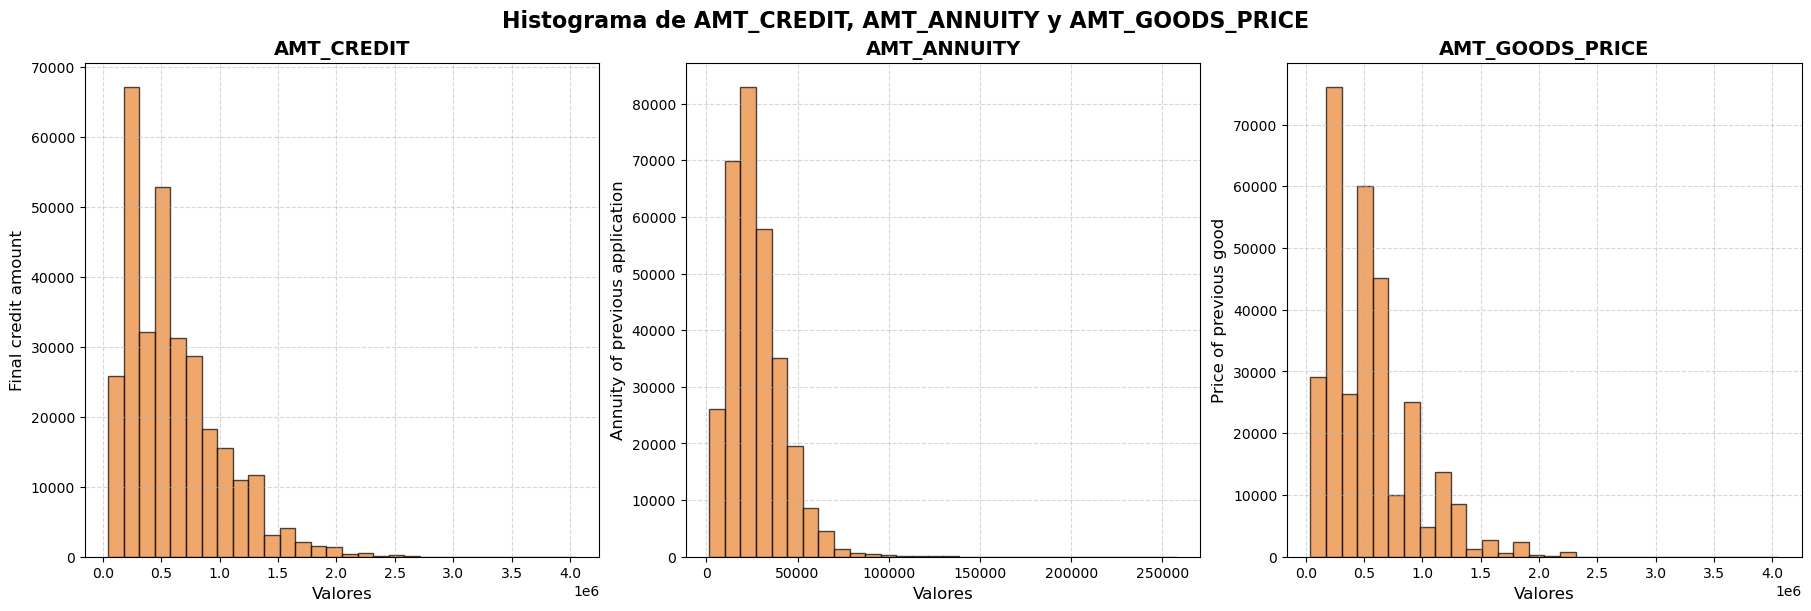

In [49]:
amt_variables = [
    "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"
]

# Crear la figura y los ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Lista de etiquetas personalizadas para cada gráfico
y_labels = [
    "Final credit amount",  # Para AMT_CREDIT
    "Annuity of previous application",  # Para AMT_ANNUITY
    "Price of previous good"  # Para AMT_GOODS_PRICE
]

# Iterar sobre cada variable, su respectivo eje y la etiqueta personalizada
for ax, var, y_label in zip(axes, amt_variables, y_labels):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel(y_label, fontsize=12)  # Etiqueta eje Y personalizada
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Título general para el grupo de variables
fig.suptitle("Histograma de AMT_CREDIT, AMT_ANNUITY y AMT_GOODS_PRICE", fontsize=16, fontweight="bold")

# Mostrar la figura
plt.show()

In [50]:
data[amt_variables].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,307499.000000,3.072330e+05
mean,5.990260e+05,27108.573909,5.383962e+05
std,4.024908e+05,14493.737315,3.694465e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16524.000000,2.385000e+05
50%,5.135310e+05,24903.000000,4.500000e+05
75%,8.086500e+05,34596.000000,6.795000e+05
max,4.050000e+06,258025.500000,4.050000e+06


El diccionario de datos no es claro con la información que representan los datos en estas variables, por lo cual no puedo decir mucho sobre estas.

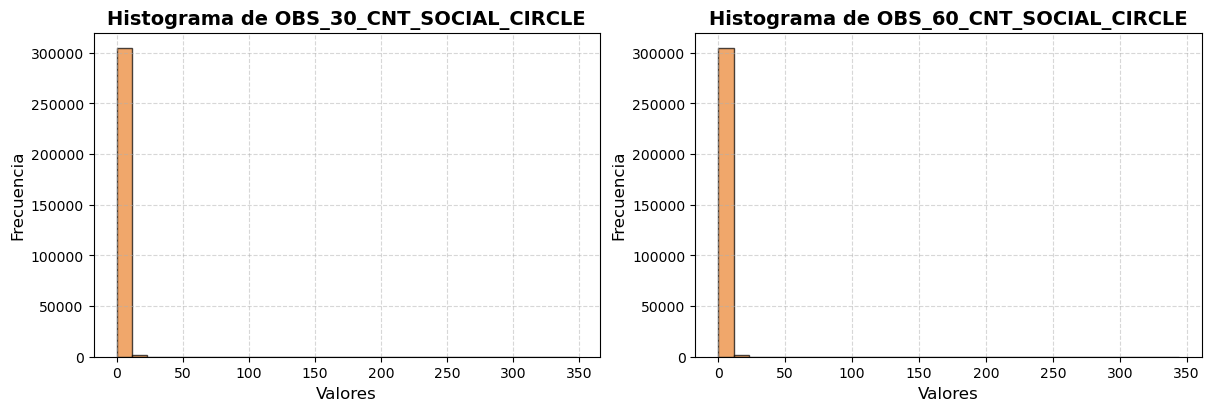

In [51]:
# Lista de variables
social_circle_variables = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, social_circle_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [52]:
data[social_circle_variables].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000
mean,1.422245,1.405292
std,2.400989,2.379803
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,348.000000,344.000000


Las variables `AMT_REQ_CREDIT_BUREAU_MON` y `AMT_REQ_CREDIT_BUREAU_YEAR` no representan relevancia estádistica, la información en los quartiles no genera información que pueda ser usada para implementar variabilidad en el modelado.

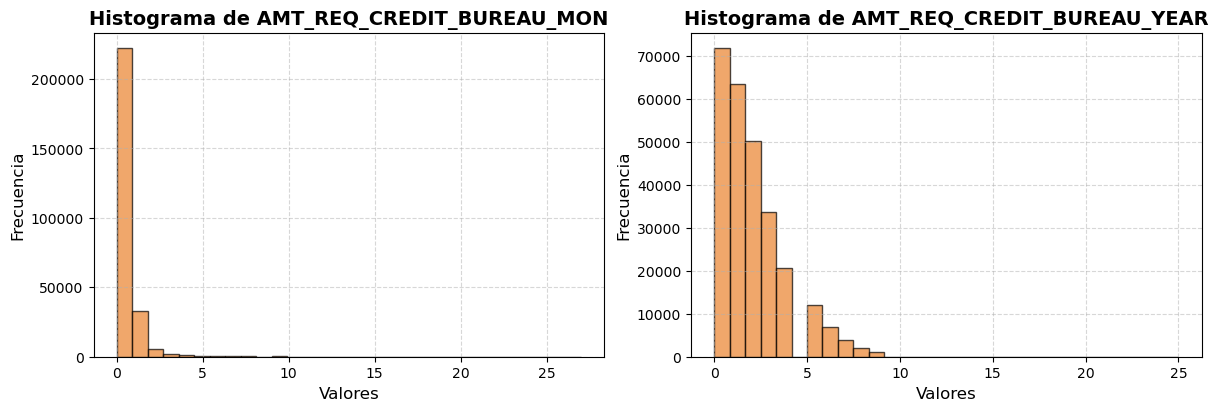

In [53]:
# Lista de variables
credit_bureau_variables = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, credit_bureau_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [54]:
data[credit_bureau_variables].describe()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000
mean,0.267395,1.899974
std,0.916002,1.869295
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,27.000000,25.000000


Finalmente, la mitad de las solicitudes de crédito suelen tener una concentración entre las **10 am** y las **2 pm**, el comportamiento de la distribución refleja similaridad a un comportamiento normal por parte de los clientes.

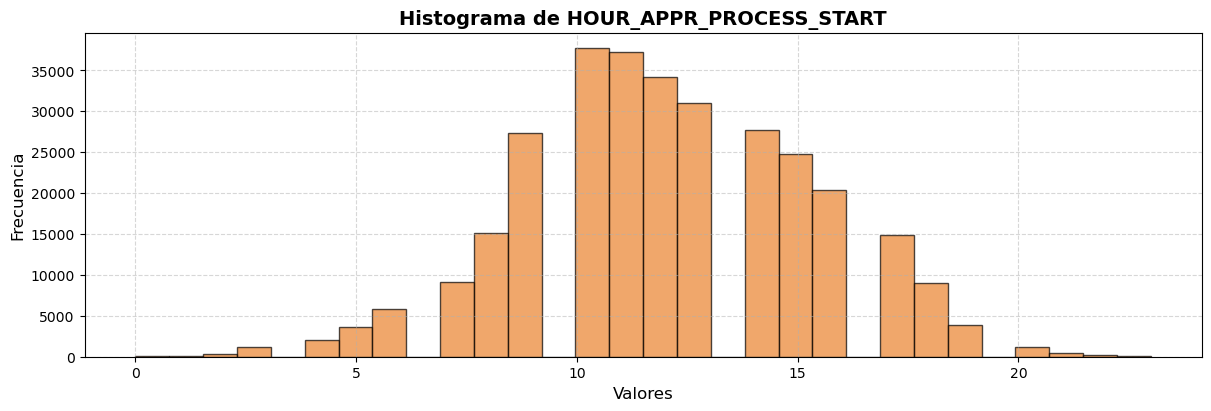

In [55]:
# Variables a graficar
variables = [
    "HOUR_APPR_PROCESS_START"
]

# Crear figura y ejes (1 fila, 1 columna)
fig, ax = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)

# Como solo hay una variable, trabajamos directamente con 'ax' en lugar de iterar
ax.hist(data[variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
ax.set_title(f"Histograma de {variables[0]}", fontsize=14, fontweight="bold")  # Título del gráfico
ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [56]:
data[variables].describe()

,HOUR_APPR_PROCESS_START
count,307511.000000
mean,12.063419
std,3.265832
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


## Análisis bivariado

In [57]:
import numpy as np

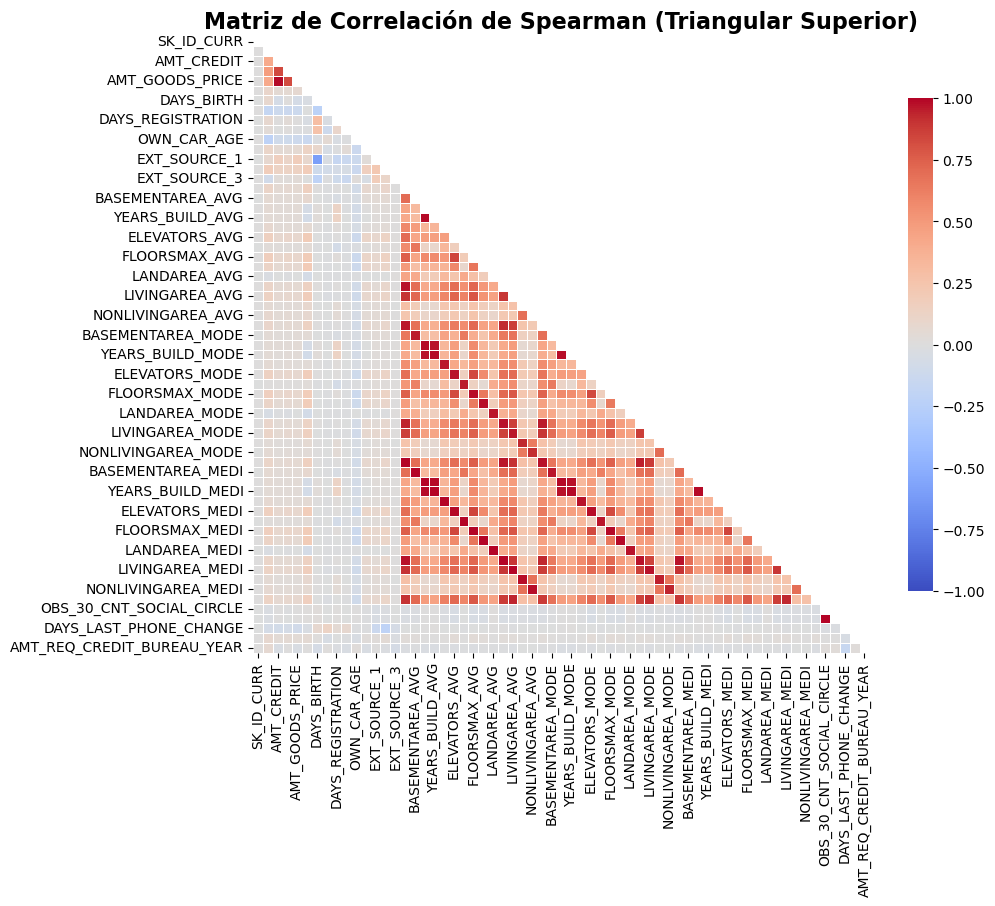

In [58]:
# Calcular la matriz de correlación de Spearman
corr_spearman = data[numeric_cols].corr(method='spearman')

# Crear una máscara para mostrar solo la parte triangular superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Crear el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", mask=mask, 
            cbar_kws={"shrink": .8}, square=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title("Matriz de Correlación de Spearman (Triangular Superior)", fontsize=16, fontweight="bold")
plt.show()

Podemos evidenciar principalmente cuatro (4) correlaciones fuertes:

* `AMT_GOODS_PRICE` - `AMT_CREDIT`: Esta correlación explica que a mayor sea el precio del bien que el cliente cotiza, mayor es el monto aprobado por la entidad crediticia.

* `AMT_ANNUITY` - `AMT_CREDIT`: Esta correlación indica que a mayor monto haya sido aprovado previamente al cliente, mayor monto se le aprobará al cliente en un futuro (monto aprovado al momento de la solicitud actual).

* `AMT_GOODS_PRICE` - `AMT_ANNUITY`: Esta correlación indica que a mayor fue el monto crediticio aprovado previamente, mayor es el monto del bien cotizado para la solicitud de crétido actual. En otras palabras, los clientes se piden cosas mas caras que en su última aprovación.

* `EXT_SOURCE_1` - `DAYS_BIRTH`: En este caso la correlación es inversa *(recordemos que days_birth está medio rara)*, lo cual nos indica que a mayor score crediticio, mayor edad tiene la persona que solicita crédito.

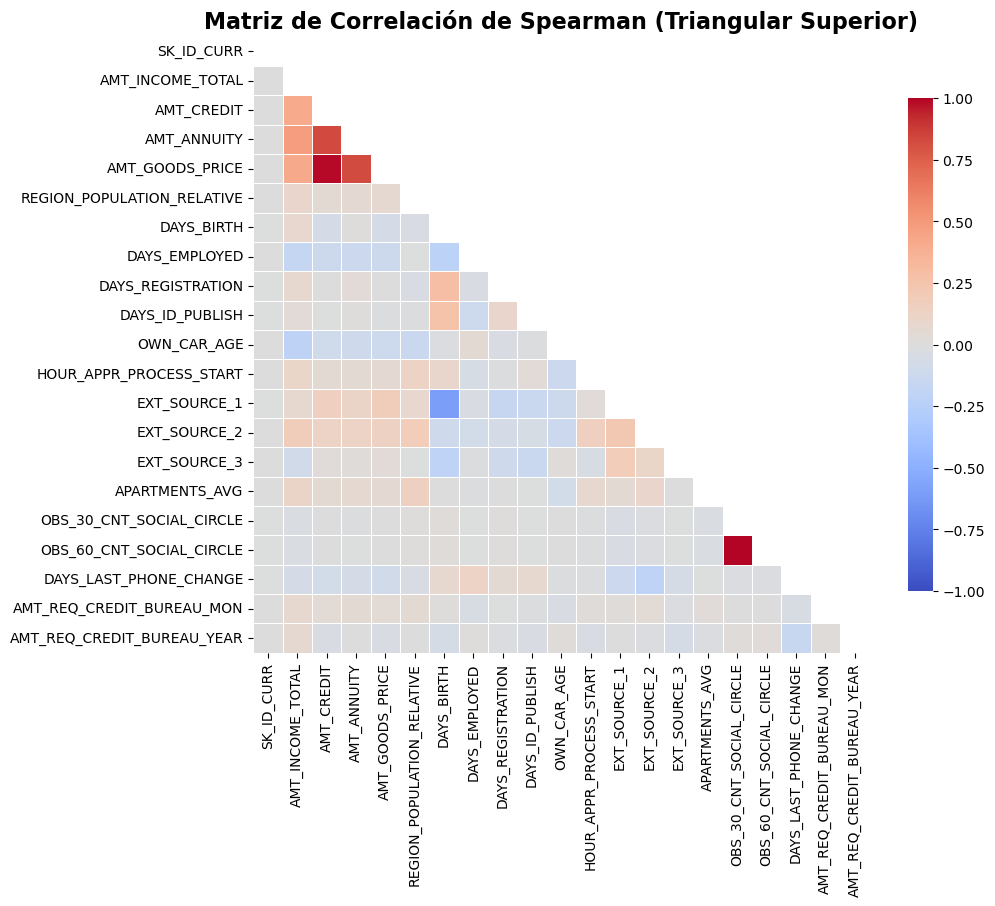

In [59]:
# Calcular la matriz de correlación de Spearman
corr_spearman = data[numeric_cols[:16]+numeric_cols[58:]].corr(method='spearman')

# Crear una máscara para mostrar solo la parte triangular superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Crear el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=False, cmap="coolwarm", mask=mask, 
            cbar_kws={"shrink": .8}, square=True, linewidths=0.5,
            vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title("Matriz de Correlación de Spearman (Triangular Superior)", fontsize=16, fontweight="bold")
plt.show()

Mis variables sugeridas:

* REGION_POPULATION_RELATIVE
* EXT_SOURCE_1
* EXT_SOURCE_2
* TOTALAREA_MODE
* HOUR_APPR_PROCESS_START
* AMT_GOODS_PRICE
* AMT_CREDIT
* DAYS_BIRTH
* AMT_ANNUITY